## Importing libraries

In [25]:
from spacy.lang.en import English
import csv as csv
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split as split
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem.snowball import SnowballStemmer

## Reading and splitting

In [18]:
nlp = English()
all_labels = []
all_tweets = []

In [19]:
with open("offenseval-training-v1.tsv", encoding='utf8') as mf:
    reader = csv.reader(mf, delimiter="\t")
    for id,tweet,a,b,c in tqdm(reader,'Reading data'):
        if id == "id":
            continue
        all_tweets.append(tweet.lower())
        if a == "OFF":
            all_labels.append(1)
        else:
            all_labels.append(0)

Reading data: 13241it [00:00, 200879.59it/s]


In [20]:
print(all_tweets[0])
#print(all_labels[3])

@user she should ask a few native americans what their take on this is.


In [21]:
tr_tweets,tst_tweets,tr_labels,tst_labels = split(all_tweets,all_labels,test_size=0.3)

### Preprocessing

In [22]:
prep_tr_tweets = []
prep_tst_tweets = []
tr_vecs = []
tst_vecs = []
other_stopwords = ['.',',',':','#','-','"','!','?','*','&','@','˝',')','(',';','´',' ','/','@user']

In [26]:
stemmer = SnowballStemmer(language='english')
for i, tweet in tqdm(enumerate(tr_tweets), 'Token and Lemmatization'):
    temp = nlp(tweet)
    words = []
    for j, token in enumerate(temp):
        if not token.is_stop and token.text not in other_stopwords:
            words.append(stemmer.stem(token.text))
    prep_tr_tweets.append(words)
for i, tweet in tqdm(enumerate(tst_tweets), 'Token and Lemmatization'):
    temp = nlp(tweet)
    asd = []
    for j, token in enumerate(temp):
        if not token.is_stop and token.text not in other_stopwords:
            asd.append(stemmer.stem(token.text))
    prep_tst_tweets.append(asd)

Token and Lemmatization: 9268it [00:05, 1560.52it/s]
Token and Lemmatization: 3972it [00:02, 1700.22it/s]


In [28]:
print(prep_tr_tweets[11])

['cbc', 'liber', 'tell', 'definit', 'middl', 'class', 'know', 'mps', 'use', 'term', 'ordinari', 'canadian', 'born', 'canadian', 'special', 'boarder', 'crosser', 'love', 'answer', 'liber', 'mute', 'point', 'butthead', 'told']


## Vectorizing

In [29]:
vectorizer = CountVectorizer()
data =[' '.join(tweet) for tweet in prep_tr_tweets]
vectorizer = vectorizer.fit(data)
vectors = vectorizer.transform(data).toarray()
tr_vecs.append(vectors)

In [30]:
data2 =[' '.join(tweet) for tweet in prep_tst_tweets]
vectors = vectorizer.transform(data2).toarray()
tst_vecs.append(vectors)

In [31]:
len(tst_vecs[0])

3972

## Classifiers

In [32]:
classifier = MultinomialNB
params = {'alpha':5,'fit_prior':True}
model = classifier(**params)
model.fit(tr_vecs[0],tr_labels)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

In [33]:
def confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

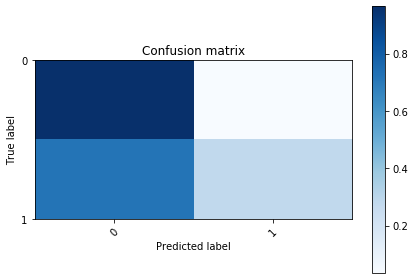

In [34]:
test_data = np.array(tst_vecs[0])
test_labels = np.array(tst_labels).reshape(-1,1)
predicted_tst_labels = model.predict(test_data)
conf = np.zeros([2,2])
confnorm = np.zeros([2,2])
for i in range(0,test_data.shape[0]):
    j = test_labels[i,:]
    k = predicted_tst_labels[i]
    conf[j,k] = conf[j,k] + 1
for i in range(0,2):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
confusion_matrix(confnorm, labels=[i for i in range(2)])
acc = model.score(test_data,test_labels)

In [35]:
print(acc)

0.7336354481369587
